## NAME :SHALINI PR
### Week 04: Graded Project - PART I

### EDA & Data Preprocessing on Google App Store Rating Dataset.

### Objective:
    1. The Goal is to explore the data and pre-process it for future use in any predictive analytics study.

### QUESTONS

### 1. Import required libraries and read the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Google_playstore_appdata.csv')
print(data)

                                                     App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews      

### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [3]:
data.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6811,Bu the Baby Bunny - Cute pet care game,FAMILY,4.4,37122,89M,"1,000,000+",Free,0,Everyone,Educational,"June 14, 2018",1.03,4.1 and up
10378,BMX Boy,GAME,4.2,839206,12M,"50,000,000+",Free,0,Everyone,Racing,"September 20, 2017",1.16.33,4.1 and up
6799,"BT Dating -Find your match, help cupid, be social",SOCIAL,4.1,158,26M,"50,000+",Free,0,Mature 17+,Social,"July 19, 2018",2.3,4.1 and up
4171,G-Homa,LIFESTYLE,3.1,777,14M,"50,000+",Free,0,Everyone,Lifestyle,"May 4, 2018",3.0.20,4.0 and up
6597,MedM Blood Pressure,MEDICAL,4.0,255,16M,"10,000+",Free,0,Everyone,Medical,"May 25, 2018",2.5.80,4.2 and up


In [4]:
print(data.head())

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

In [5]:
print(data.shape)

(10841, 13)


In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None


### INFERNECE
    1.The data consists of 10841 rows and 13 columns.
    2.Considering the columns only 'Rating' is in float64 datatype rest all of them are in object(str) datatypes.

### 3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.

In [7]:
print(data.describe())

            Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000


#### 1. The Rating column only is float data type, rest all are object data type.
#### 2. We use " include='object' " to get the summary statistics of those data.

In [8]:
print(data.describe(include="object"))

           App Category Reviews                Size    Installs   Type  Price  \
count    10841    10841   10841               10841       10841  10840  10841   
unique    9660       34    6002                 462          22      3     93   
top     ROBLOX   FAMILY       0  Varies with device  1,000,000+   Free      0   
freq         9     1972     596                1695        1579  10039  10040   

       Content Rating Genres    Last Updated         Current Ver Android Ver  
count           10840  10841           10841               10833       10838  
unique              6    120            1378                2832          33  
top          Everyone  Tools  August 3, 2018  Varies with device  4.1 and up  
freq             8714    842             326                1459        2451  


####  The summary statistics of complete data at once we use " include='all' 

In [9]:
print(data.describe(include="all"))

           App Category       Rating Reviews                Size    Installs  \
count    10841    10841  9367.000000   10841               10841       10841   
unique    9660       34          NaN    6002                 462          22   
top     ROBLOX   FAMILY          NaN       0  Varies with device  1,000,000+   
freq         9     1972          NaN     596                1695        1579   
mean       NaN      NaN     4.193338     NaN                 NaN         NaN   
std        NaN      NaN     0.537431     NaN                 NaN         NaN   
min        NaN      NaN     1.000000     NaN                 NaN         NaN   
25%        NaN      NaN     4.000000     NaN                 NaN         NaN   
50%        NaN      NaN     4.300000     NaN                 NaN         NaN   
75%        NaN      NaN     4.500000     NaN                 NaN         NaN   
max        NaN      NaN    19.000000     NaN                 NaN         NaN   

         Type  Price Content Rating Gen

### INFERNCE
    Columns that need to be worked upon for model building:
    1. The columns 'App' can be drop after doing basic analysis
    2. 'Rating' requires enconding.
    3. 'category' requires enconding depends on task.
    4. 'size','Reviews','Installs', 'Type', 'Price' and 'Content Rating' are relevant for our model building.
    5. 'Genres',Last Updated', 'Current Ver','Android Ver' are not relevant for our observations.

### 4. Check if there are any duplicate records in the dataset? if any drop them.

In [10]:
print()
data.duplicated().sum()

483

### There are 483 duplicate vales and we are dropping using drop_duplicates

In [11]:
data.drop_duplicates(inplace=True)

#### To check and verify whether all duplicates are removed.

In [12]:
data.duplicated().sum()

0

### 5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them

In [13]:
print(data['Category'].unique())

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']


### There is a invalid category 1.9 which should be removed.

In [14]:
data[data['Category']=='1.9'].index

Int64Index([10472], dtype='int64')

In [15]:
App_data_group = data.groupby(['Category'])
Each_category=App_data_group['Category'].count().sort_values(ascending=False)

In [16]:
print('Each_category:')
print(Each_category)

Each_category:
Category
FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: i

#### The count of invalid category present is 1, which can be removed from the data

In [17]:
data=data.drop(index=10472, axis=0)

In [18]:
data[data['Category']=='1.9'].index

Int64Index([], dtype='int64')

### 6. Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)

In [19]:
# Check missing values in 'Rating' column
print("The missing values in rating column is :", data['Rating'].isnull().sum())

# Drop missing values in 'Rating' column
data.dropna(subset=['Rating'], inplace=True)

# Create 'Rating_category' column
data['Rating_category'] = np.where(data['Rating'] > 3.5, 'High', 'Low')

The missing values in rating column is : 1465


In [20]:
data['Rating_category']

0        High
1        High
2        High
3        High
4        High
         ... 
10834    High
10836    High
10837    High
10839    High
10840    High
Name: Rating_category, Length: 8892, dtype: object

### 7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.

In [21]:
print("Count of high and low rating for category :" )
print(data['Rating_category'].value_counts())
print("Percentage of high and low rating for category :" )
print(data['Rating_category'].value_counts(normalize=True)*100)

Count of high and low rating for category :
High    8012
Low      880
Name: Rating_category, dtype: int64
Percentage of high and low rating for category :
High    90.103464
Low      9.896536
Name: Rating_category, dtype: float64


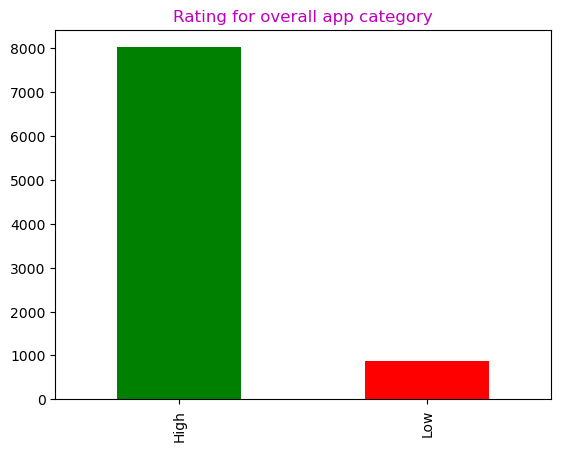

In [22]:
data['Rating_category'].value_counts().plot(kind = 'bar',color=['green','red'])
plt.title('Rating for overall app category',color='m')
plt.show()

### INFERNECE
    1. The distribution of the 'Rating_category' column shows that there are 8471 ratings categorized as 'High' and 896 ratings categorized as 'Low'. The column is heavily imbalanced, with a significantly larger number of ratings falling into the 'High' category compared to the 'Low' category.

### 8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)

In [23]:
# Step 1: Convert the 'Reviews' column to numeric data type
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')

In [24]:
data['Reviews']

0           159
1           967
2         87510
3        215644
4           967
          ...  
10834         7
10836        38
10837         4
10839       114
10840    398307
Name: Reviews, Length: 8892, dtype: int64

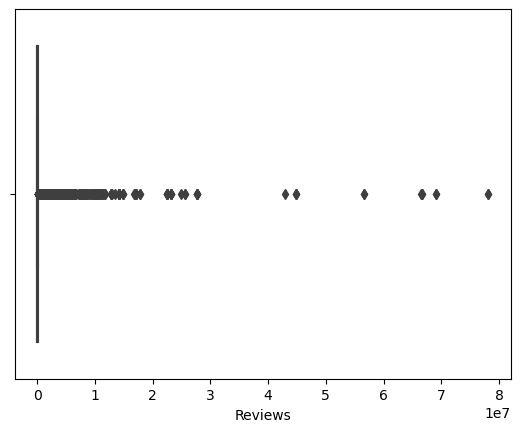

In [25]:
#As we can observe the column reviews have high positive skewness. Lets reduce the skewness using log transformation approach.
sns.boxplot(data['Reviews'])
plt.show()

In [26]:
# Step 2: Check for the presence of outliers in the 'Reviews' column
Q1 = data['Reviews'].quantile(0.25)
Q3 = data['Reviews'].quantile(0.75)
IQR = Q3 - Q1

In [27]:
IQR

71102.75

In [28]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['Reviews'] < lower_bound) | (data['Reviews'] > upper_bound)]

In [29]:
outliers

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
18,FlipaClip - Cartoon animation,ART_AND_DESIGN,4.3,194216,39M,"5,000,000+",Free,0,Everyone,Art & Design,"August 3, 2018",2.2.5,4.0.3 and up,High
19,ibis Paint X,ART_AND_DESIGN,4.6,224399,31M,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",5.5.4,4.1 and up,High
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device,High
72,"Android Auto - Maps, Media, Messaging & Voice",AUTO_AND_VEHICLES,4.2,271920,16M,"10,000,000+",Free,0,Teen,Auto & Vehicles,"July 11, 2018",Varies with device,5.0 and up,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10740,PhotoFunia,PHOTOGRAPHY,4.3,316378,4.4M,"10,000,000+",Free,0,Everyone,Photography,"June 3, 2017",4.0.7.0,2.3 and up,High
10781,Modern Strike Online,GAME,4.3,834117,44M,"10,000,000+",Free,0,Teen,Action,"July 30, 2018",1.25.4,4.1 and up,High
10784,Big Hunter,GAME,4.3,245455,84M,"10,000,000+",Free,0,Everyone 10+,Action,"May 31, 2018",2.8.6,4.0 and up,High
10809,Castle Clash: RPG War and Strategy FR,FAMILY,4.7,376223,24M,"1,000,000+",Free,0,Everyone,Strategy,"July 18, 2018",1.4.2,4.1 and up,High


In [30]:
# Step 3: Handle outliers using log transformation
data['Reviews'] = np.log1p(data['Reviews'])

In [31]:
# Print the DataFrame after handling outliers with log transformation
print(data)

                                                     App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10834                                      FR Calculator               FAMILY   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating    Reviews   

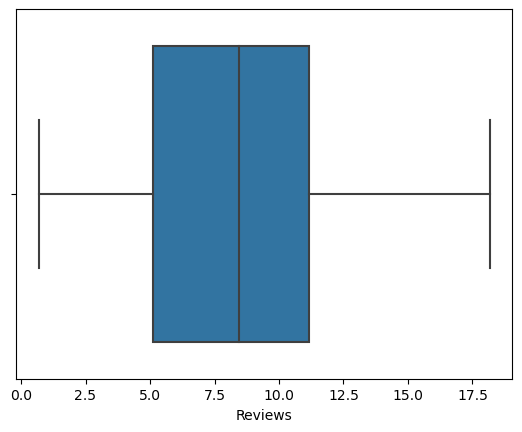

In [32]:
#As we can observe after log transformation the column reviews is been normally distributed and free of outliers.
sns.boxplot(data['Reviews'])
plt.show()

### 9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')

In [33]:
data['Size'].head(5)

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size, dtype: object

In [34]:
data = data[data['Size'] != 'Varies with device']

In [35]:
def convert(entry):
        if entry[-1] == 'k':
            new_entry = float(entry.replace('k',''))*1000
        else:
            new_entry = float(entry.replace('M',''))*1000000
        return new_entry

In [36]:
data['Size'] = data['Size'].apply(lambda x : convert(x))

In [37]:
data['Size'].head()

0    19000000.0
1    14000000.0
2     8700000.0
3    25000000.0
4     2800000.0
Name: Size, dtype: float64

### 10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.

In [38]:
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '100+', '500+', '10+', '1,000,000,000+',
       '5+', '50+', '1+'], dtype=object)

In [39]:
data['Installs'] = data['Installs'].str.replace(',','').str.replace('+','')

In [40]:
data['Installs'] = pd.to_numeric(data['Installs'], errors = 'coerce')

In [41]:
data['Installs'].head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int64

### 11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.

In [42]:
data['Price'].unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [43]:
data['Price'] = data['Price'].str.replace('$', '')

In [44]:
data['Price'] = pd.to_numeric(data['Price'], errors = 'coerce')

In [45]:
data['Price'].unique()

array([  0.  ,   4.99,   6.99,   7.99,   3.99,   5.99,   2.99,   1.99,
         9.99,   0.99,   9.  ,   5.49,  10.  ,  24.99,  11.99,  79.99,
        16.99,  14.99,  29.99,  12.99,   3.49,  10.99,   7.49,   1.5 ,
        19.99,  15.99,  33.99,  39.99,   2.49,   4.49,   1.7 ,   1.49,
         3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,
         1.61,   1.59,   6.49,   1.29, 299.99, 379.99,  37.99,  18.99,
       389.99,   8.49,   1.75,  14.  ,   2.  ,   3.08,   2.59,  19.4 ,
        15.46,   8.99,   3.04,  13.99,   4.29,   3.28,   4.6 ,   1.  ,
         2.9 ,   1.97,   2.56,   1.2 ])

### 12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' columns since which are redundant for our analysis)


In [46]:
data = data.drop(['App','Rating','Genres','Last Updated', 'Current Ver','Android Ver' ], axis = 1)

In [47]:
data.head(2)

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,ART_AND_DESIGN,5.075174,19000000.0,10000,Free,0.0,Everyone,High
1,ART_AND_DESIGN,6.875232,14000000.0,500000,Free,0.0,Everyone,High


### 13. Encode the categorical columns.

In [48]:
lc= LabelEncoder()

In [49]:
def categorical_to_numeric(df):
    list_cols = list(df.select_dtypes(include=['object']).columns)
    for col in list_cols:
        df[col] = lc.fit_transform(list(df[col]))

In [50]:
categorical_to_numeric(data)

In [51]:
data.dtypes

Category             int64
Reviews            float64
Size               float64
Installs             int64
Type                 int64
Price              float64
Content Rating       int64
Rating_category      int64
dtype: object

In [52]:
data.sample(10)

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
4555,26,3.178054,8900000.0,5000,0,0.00,1,0
3323,29,12.518267,22000000.0,5000000,0,0.00,1,0
1957,14,13.531879,57000000.0,100000000,0,0.00,4,0
3741,21,6.601230,6300000.0,500000,0,0.00,1,1
7484,11,7.681560,3700000.0,50000,0,0.00,1,0
5559,14,6.152733,80000000.0,10000,0,0.00,1,0
9084,23,5.472271,6400000.0,10000,0,0.00,1,0
10134,25,6.440947,1200000.0,100000,0,0.00,1,1
4297,11,8.767018,59000000.0,100000,0,0.00,1,0
5475,11,2.079442,1200000.0,100,1,9.99,1,0


### 14. Segregate the target and independent features (Hint: Use Rating_category as the target)

In [53]:
y = data[['Rating_category']]
X = data.drop('Rating_category',axis=1)

In [54]:
y.columns

Index(['Rating_category'], dtype='object')

In [55]:
X.columns

Index(['Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating'],
      dtype='object')

### 15. Split the dataset into train and test.

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=555)

In [57]:
X_train.shape

(5568, 7)

In [58]:
X_test.shape

(1856, 7)

In [59]:
y_train.shape

(5568, 1)

In [60]:
y_test.shape

(1856, 1)

### 16. Standardize the data, so that the values are within a particular range.

In [61]:
mm = MinMaxScaler()

X_train.iloc[:,:] = mm.fit_transform(X_train.iloc[:,:])
X_test.iloc[:,:] = mm.transform(X_test.iloc[:,:])

In [62]:
X_train.head(2)

,Category,Reviews,Size,Installs,Type,Price,Content Rating
7924,0.37500,0.453198,0.239916,4.999900e-05,0.0,0.0,0.2
10771,0.78125,0.129808,0.023893,9.990000e-07,0.0,0.0,0.2


In [63]:
X_test.head(2)

,Category,Reviews,Size,Installs,Type,Price,Content Rating
6748,0.34375,0.404944,0.719969,0.000050,0.0,0.0,0.2
10219,0.12500,0.155911,0.179910,0.000005,0.0,0.0,0.2
